In [2]:
import pandas as pd
import time
import numpy as np
from joblib import dump,load
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
%matplotlib inline

In [4]:
df = load("hand_dataset")
df_test = load("stian_dataset_all")

### Data Cleaning

Customize the data you want to train on. Some examples might be
- Only use every third frame 
- Only use certain rotations
- Only with sleeves included

In [5]:
print("Length of training data before cleaning: ", len(df))
third_images = pd.Series(df.index).apply(lambda x : int(str(x.split("/")[1].split("_")[0])) % 3 == 0)
df = df.loc[df.index[third_images]]
print("Length of training data after cleaning: ", len(df))

#Also, the test data has a lot of almost similar frames, so we want to increase the frame rate for that one as well
print("Length of test data before cleaning: ", len(df_test))
fifth_images = pd.Series(df_test.index).apply(lambda x : int(str(x.split("/")[1].split("_")[0])) % 5 == 0)
df_test = df_test.loc[df_test.index[fifth_images]]
print("Length of test data after cleaning: ", len(df_test))

Length of training data before cleaning:  47200
Length of training data after cleaning:  15776
Length of test data before cleaning:  6528
Length of test data after cleaning:  1312


Define train and test sets. The test set should be an unseen hand with slightly different threshold (Typical live demo data). This is because the classifiers learns the training data really well, but might fail to understand live data of unseen hands. 

In [6]:
df = shuffle(df)
X_train = df["image"]
y_train = df["count"]
X_test = df_test["image"]
y_test = df_test["count"]

In [7]:
print("Training data: \n", df["count"].value_counts()) #Check if the dataset is unbalanced
print("Testing data: \n", df_test["count"].value_counts())

Training data: 
 2    3632
1    3520
3    2368
5    2208
4    2096
0    1952
Name: count, dtype: int64
Testing data: 
 4    256
5    224
2    224
3    208
0    208
1    192
Name: count, dtype: int64


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
for i in range(1,6):
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=550,max_depth=50)
    rf.fit(list(X_train),y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    pred = rf.predict(list(X_test))
    pred_time = time.time() - start_time
    
    acc = accuracy_score(y_test,pred)
    rf_scores.append(acc)
    print("Iteration {} gave accuracy: {:0.5f}, fit time: {:0.3f}s, prediction time: {:0.3f}s"
          .format(i,acc,fit_time,pred_time))
print("Average score after 5 iterations: {:0.5f}".format(sum(rf_scores) / len(rf_scores)))

Iteration 1 gave accuracy: 0.88643, fit time: 61.180s, prediction time: 0.585s
Iteration 2 gave accuracy: 0.89101, fit time: 61.318s, prediction time: 0.579s
Iteration 3 gave accuracy: 0.88262, fit time: 62.113s, prediction time: 0.564s
Iteration 4 gave accuracy: 0.89024, fit time: 62.707s, prediction time: 0.558s
Iteration 5 gave accuracy: 0.89024, fit time: 62.778s, prediction time: 0.555s
Average score after 5 iterations: 0.88811


Confusion matrix for random forest with accuracy 0.88338


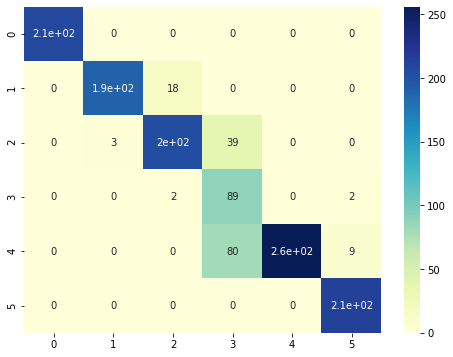

In [9]:
rf = RandomForestClassifier(n_estimators=550,max_depth=50)
rf.fit(list(X_train),y_train)
pred = rf.predict(list(X_test))
print("Confusion matrix for random forest with accuracy {:0.5f}".format(accuracy_score(y_test,pred)))

rf_confusion_matrix = confusion_matrix(pred,y_test)
rf_df = pd.DataFrame(rf_confusion_matrix, index = range(0,6), columns = range(0,6))
plt.figure(figsize = (8,6))
sn.heatmap(rf_df, annot=True,cmap="YlGnBu")

### Support Vector Machines

Accuracy: 0.86128, fit time: 1658.192s, prediction time: 82.230s
Confusion matrix for support vector classifier with accuracy 0.86128


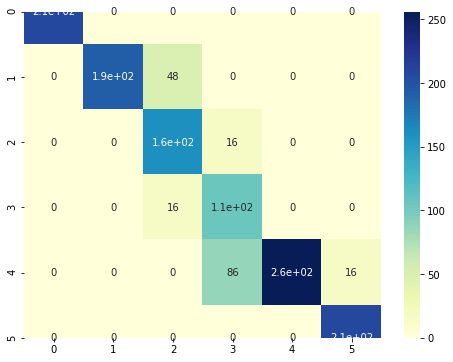

In [11]:
from sklearn.svm import SVC
#SVC is exponentially growing in size as the training data increase, which makes it difficult to find parameters
#that will work on our training data. This demonstrates how comprehensive the training might be 

svc = SVC(gamma=0.01)
start_time = time.time()
svc.fit(list(X_train),y_train)
fit_time = time.time() - start_time

start_time = time.time()
pred = svc.predict(list(X_test))
pred_time = time.time() - start_time

acc = accuracy_score(y_test,pred)
print("Accuracy: {:0.5f}, fit time: {:0.3f}s, prediction time: {:0.3f}s"
      .format(acc,fit_time,pred_time))

print("Confusion matrix for support vector classifier with accuracy {:0.5f}".format(accuracy_score(y_test,pred)))

svc_confusion_matrix = confusion_matrix(pred,y_test)
svc_df = pd.DataFrame(svc_confusion_matrix, index = range(0,6), columns = range(0,6))
plt.figure(figsize = (8,6))
sn.heatmap(svc_df, annot=True,cmap="YlGnBu")

### Decision Tree


In [12]:
from sklearn import tree

dtree_scores = []
for i in range(1,6):
    start_time = time.time()
    dtree = tree.DecisionTreeClassifier()
    dtree.fit(list(X_train),y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    pred = dtree.predict(list(X_test))
    pred_time = time.time() - start_time
    
    acc = accuracy_score(y_test,pred)
    dtree_scores.append(acc)
    print("Iteration {} gave accuracy: {:0.5f}, fit time: {:0.3f}s, prediction time: {:0.3f}s"
          .format(i,acc,fit_time,pred_time))
print("Average score after 5 iterations: {:0.5f}".format(sum(dtree_scores) / len(dtree_scores)))

Iteration 1 gave accuracy: 0.49314, fit time: 8.959s, prediction time: 0.230s
Iteration 2 gave accuracy: 0.52896, fit time: 9.095s, prediction time: 0.230s
Iteration 3 gave accuracy: 0.51601, fit time: 8.737s, prediction time: 0.231s
Iteration 4 gave accuracy: 0.51372, fit time: 8.674s, prediction time: 0.236s
Iteration 5 gave accuracy: 0.48323, fit time: 8.709s, prediction time: 0.229s
Average score after 5 iterations: 0.50701


Confusion matrix for decision tree with accuracy 0.51372


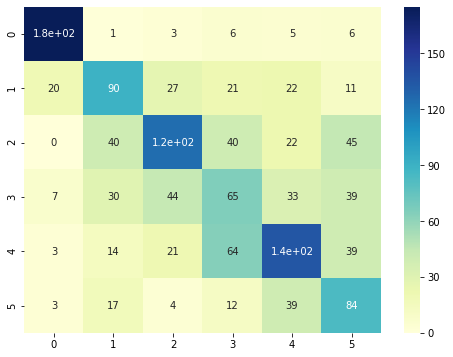

In [11]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(list(X_train),y_train)
pred = dtree.predict(list(X_test))
print("Confusion matrix for decision tree with accuracy {:0.5f}".format(accuracy_score(y_test,pred)))

dtree_confusion_matrix = confusion_matrix(pred,y_test)
dtree_df = pd.DataFrame(dtree_confusion_matrix, index = range(0,6), columns = range(0,6))
plt.figure(figsize = (8,6))
sn.heatmap(dtree_df, annot=True,cmap="YlGnBu")

### Gaussian Naive Bayes


In [14]:
from sklearn.naive_bayes import GaussianNB

gnb_scores = []
for i in range(1,6):
    start_time = time.time()
    gnb = GaussianNB()
    gnb.fit(list(X_train),y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    pred = gnb.predict(list(X_test))
    pred_time = time.time() - start_time
    
    acc = accuracy_score(y_test,pred)
    gnb_scores.append(acc)
    print("Iteration {} gave accuracy: {:0.5f}, fit time: {:0.3f}s, prediction time: {:0.3f}s"
          .format(i,acc,fit_time,pred_time))
print("Average score after 5 iterations: {:0.5f}".format(sum(gnb_scores) / len(gnb_scores)))

Iteration 1 gave accuracy: 0.22561, fit time: 3.576s, prediction time: 0.390s
Iteration 2 gave accuracy: 0.22561, fit time: 3.415s, prediction time: 0.379s
Iteration 3 gave accuracy: 0.22561, fit time: 3.425s, prediction time: 0.382s
Iteration 4 gave accuracy: 0.22561, fit time: 3.404s, prediction time: 0.374s
Iteration 5 gave accuracy: 0.22561, fit time: 3.404s, prediction time: 0.378s
Average score after 5 iterations: 0.22561


Confusion matrix for Gaussian Naive Bayes with accuracy 0.22561


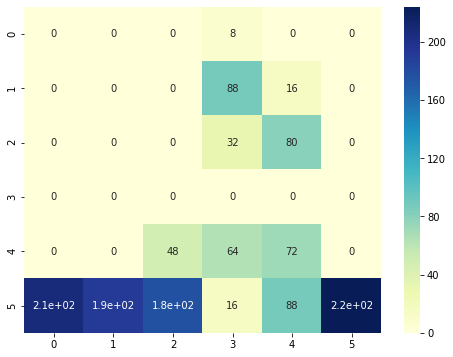

In [13]:
gnb = GaussianNB()
gnb.fit(list(X_train),y_train)
pred = gnb.predict(list(X_test))

print("Confusion matrix for Gaussian Naive Bayes with accuracy {:0.5f}".format(accuracy_score(y_test,pred)))

gnb_confusion_matrix = confusion_matrix(pred,y_test)
gnb_df = pd.DataFrame(gnb_confusion_matrix, index = range(0,6), columns = range(0,6))
plt.figure(figsize = (8,6))
sn.heatmap(gnb_df, annot=True,cmap="YlGnBu")

### Neural Network (Multi-layer Perceptron)

In [16]:
from sklearn.neural_network import MLPClassifier

mlp_scores = []
for i in range(1,6):
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,50,50))
    mlp.fit(list(X_train),y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    pred = mlp.predict(list(X_test))
    pred_time = time.time() - start_time
    
    acc = accuracy_score(y_test,pred)
    mlp_scores.append(acc)
    print("Iteration {} gave accuracy: {:0.5f}, fit time: {:0.3f}s, prediction time: {:0.3f}s"
          .format(i,acc,fit_time,pred_time))
print("Average score after 5 iterations: {:0.5f}".format(sum(mlp_scores) / len(mlp_scores)))

Iteration 1 gave accuracy: 0.80488, fit time: 63.102s, prediction time: 0.295s
Iteration 2 gave accuracy: 0.75915, fit time: 58.018s, prediction time: 0.294s
Iteration 3 gave accuracy: 0.78963, fit time: 54.368s, prediction time: 0.291s
Iteration 4 gave accuracy: 0.75229, fit time: 55.746s, prediction time: 0.291s
Iteration 5 gave accuracy: 0.71265, fit time: 55.977s, prediction time: 0.291s
Average score after 5 iterations: 0.76372


Confusion matrix for MLP with accuracy 0.73476


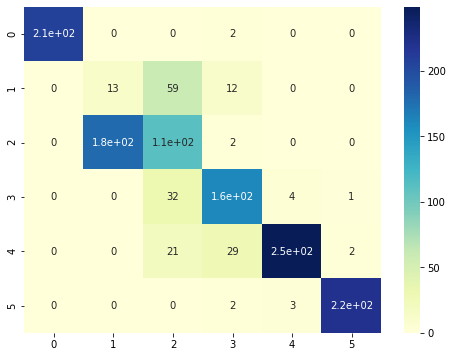

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,50,50))
mlp.fit(list(X_train),y_train)
pred = mlp.predict(list(X_test))
print("Confusion matrix for MLP with accuracy {:0.5f}".format(accuracy_score(y_test,pred)))

mlp_confusion_matrix = confusion_matrix(pred,y_test)
mlp_df = pd.DataFrame(mlp_confusion_matrix, index = range(0,6), columns = range(0,6))
plt.figure(figsize = (8,6))
sn.heatmap(mlp_df, annot=True,cmap="YlGnBu")

### K-nearest neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for i in range(1,6):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(list(X_train),y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    pred = knn.predict(list(X_test))
    pred_time = time.time() - start_time
    
    acc = accuracy_score(y_test,pred)
    knn_scores.append(acc)
    print("Iteration {} gave accuracy: {:0.5f}, fit time: {:0.3f}s, prediction time: {:0.3f}s"
          .format(i,acc,fit_time,pred_time))
print("Average score after 5 iterations: {:0.5f}".format(sum(knn_scores) / len(knn_scores)))

Iteration 1 gave accuracy: 0.75915, fit time: 4.965s, prediction time: 80.791s
Iteration 2 gave accuracy: 0.75915, fit time: 4.854s, prediction time: 79.600s
Iteration 3 gave accuracy: 0.75915, fit time: 4.809s, prediction time: 81.565s
Iteration 4 gave accuracy: 0.75915, fit time: 4.986s, prediction time: 82.279s
Iteration 5 gave accuracy: 0.75915, fit time: 5.038s, prediction time: 80.590s
Average score after 5 iterations: 0.75915


Confusion matrix for MLP with accuracy 0.75915


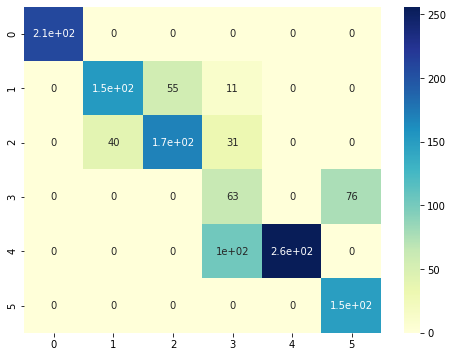

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(list(X_train),y_train)
pred = knn.predict(list(X_test))
print("Confusion matrix for MLP with accuracy {:0.5f}".format(accuracy_score(y_test,pred)))

knn_confusion_matrix = confusion_matrix(pred,y_test)
knn_df = pd.DataFrame(knn_confusion_matrix, index = range(0,6), columns = range(0,6))
plt.figure(figsize = (8,6))
sn.heatmap(knn_df, annot=True,cmap="YlGnBu")